In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gplately
import pygplates
import cartopy.crs as ccrs

In [9]:
#set directories
rotation_model = pygplates.RotationModel('../../data/02_MER21/1000_0_rotfile_Merdith_et_al.rot')
topology_features = ['../../data/02_MER21/250-0_plate_boundaries_Merdith_et_al.gpml',
                     '../../data/02_MER21/410-250_plate_boundaries_Merdith_et_al.gpml',
                     '../../data/02_MER21/TopologyBuildingBlocks_Merdith_et_al.gpml',
                     '../../data/02_MER21/1000-410-Convergence_Merdith_et_al.gpml',
                     '../../data/02_MER21/1000-410-Divergence_Merdith_et_al.gpml',
                     '../../data/02_MER21/1000-410-Topologies_Merdith_et_al.gpml',
                     '../../data/02_MER21/1000-410-Transforms_Merdith_et_al.gpml']
polygons = pygplates.FeatureCollection('../../data/02_MER21/Global_EarthByte_GeeK07_COB_Terranes_ContinentsOnly_MER21.gpml')

# Use the PlateReconstruction object to create a plate motion model
model = gplately.PlateReconstruction(rotation_model, topology_features, polygons)


In [12]:
data = pd.read_csv('../../data/00_soils/AJB Paleozoic v9.csv', encoding='ISO-8859-1')

all_pt_lon = data['LONG'].values
all_pt_lat = data['LAT'].values

# Call the Points object: pass the PlateReconstruction object, and the latitudes and longitudes of the seed points!
all_gpts = gplately.Points(model, all_pt_lon, all_pt_lat)

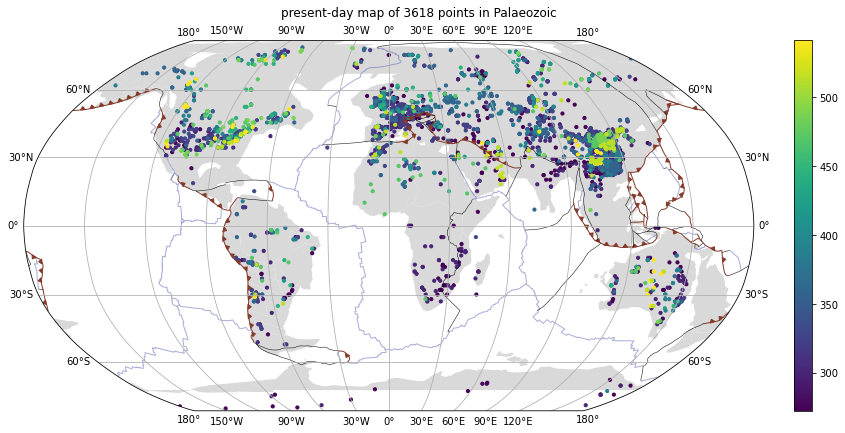

In [21]:
#make present-day plot of points
gPlot = gplately.plot.PlotTopologies(model, 0, polygons)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection=ccrs.Robinson(central_longitude=0))

#gplot.plot_continents(ax1, facecolor='0.8')
gPlot.plot_coastlines(ax, color='0.85')
gPlot.plot_ridges_and_transforms(ax, lw=1, alpha=0.5, color='#545EB3')
gPlot.plot_trenches(ax, lw=1, color='#853a2b')
gPlot.plot_misc_boundaries(ax, lw=0.5, color='k')
gPlot.plot_subduction_teeth(ax, color='#853a2b')
#sc = ax.scatter(pt_lon, pt_lat,
#                c=df['Depositional environment category (1 = intra-platform basin, 2 = inner ramp, 3 = outer ramp, 4 = slope, 5 = basinal)'],
#                s=10, transform=ccrs.PlateCarree())
sc = ax.scatter(all_pt_lon, all_pt_lat,
                c=data['Start'],
                s=10, transform=ccrs.PlateCarree())

lat_spacing = 30
lon_spacing = 30
ax.gridlines(
    draw_labels=True,
    ylocs=list(np.arange(-90, 90+lat_spacing, lat_spacing)),
    xlocs=list(np.arange(-180,180+lon_spacing, lon_spacing)),
)

fig.colorbar(sc, fraction=0.03)
fig.suptitle(f'present-day map of {len(all_pt_lon)} points in Palaeozoic')
fig.tight_layout()
#fig.savefig('./figs/present-day.png')

KeyError: 'age'

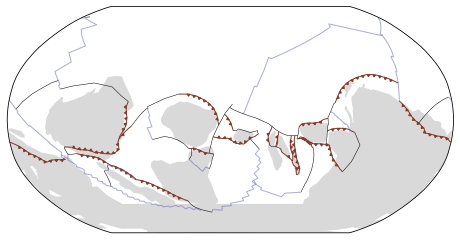

In [51]:
times_of_interest = [470, 450, 430, 400, 370]
for time in times_of_interest:
    time_subset = data[(data['Start']>= 470) & 
                   (data['End'] <= 470)]

    reconstruction_time = time#np.mean([young_time, old_time])

    recon_subset = data[(data['Start']>= 470) & (data['End'] <= 470)]
    recon_pt_lon = recon_subset['LONG'].values
    recon_pt_lat = recon_subset['LAT'].values

    
    # Call the Points object: pass the PlateReconstruction object, and the latitudes and longitudes of the seed points!
    recon_gpts = gplately.Points(model, recon_pt_lon, recon_pt_lat)

    rlons, rlats = recon_gpts.reconstruct(reconstruction_time)
    #time = 535 #Ma
    gPlot = gplately.plot.PlotTopologies(model, reconstruction_time, polygons)

    fig = plt.figure(figsize=(8,6))
    #ax = fig.add_subplot(111, projection=ccrs.Orthographic(central_longitude=75,
    #                                                       central_latitude=-30))
    ax = fig.add_subplot(111, projection=ccrs.Robinson(central_longitude=0))

    #gplot.plot_continents(ax1, facecolor='0.8')
    gPlot.plot_coastlines(ax, color='0.85')
    gPlot.plot_ridges_and_transforms(ax, lw=1, alpha=0.5, color='#545EB3')
    gPlot.plot_trenches(ax, lw=1, color='#853a2b')
    gPlot.plot_misc_boundaries(ax, lw=0.5, color='k')
    gPlot.plot_subduction_teeth(ax, color='#853a2b')
    sc = ax.scatter(rlons, rlats,
                    c=recon_subset['age'],
                    s=10, transform=ccrs.PlateCarree())

    ax.set_title(f'{len(rlons)} points at {reconstruction_time} Ma')

    # add a legend
    ax.set_global()
    #ax.set_extent([60, 120, -30, 10], crs=ccrs.PlateCarree())

    lat_spacing = 30
    lon_spacing = 30
    ax.gridlines(
        draw_labels=True,
        ylocs=list(np.arange(-90, 90+lat_spacing, lat_spacing)),
        xlocs=list(np.arange(-180,180+lon_spacing, lon_spacing)),
    )

    #fig.savefig('./figs/pgeog_at_535.png')

    fig.colorbar(sc)

In [ ]:
#make present-day plot of points
gPlot = gplately.plot.PlotTopologies(model, 0, polygons)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection=ccrs.Robinson(central_longitude=0))

#gplot.plot_continents(ax1, facecolor='0.8')
gPlot.plot_coastlines(ax, color='0.85')
gPlot.plot_ridges_and_transforms(ax, lw=1, alpha=0.5, color='#545EB3')
gPlot.plot_trenches(ax, lw=1, color='#853a2b')
gPlot.plot_misc_boundaries(ax, lw=0.5, color='k')
gPlot.plot_subduction_teeth(ax, color='#853a2b')
#sc = ax.scatter(pt_lon, pt_lat,
#                c=df['Depositional environment category (1 = intra-platform basin, 2 = inner ramp, 3 = outer ramp, 4 = slope, 5 = basinal)'],
#                s=10, transform=ccrs.PlateCarree())
sc = ax.scatter(pt_lon, pt_lat,
                c=subset['age'],
                s=10, transform=ccrs.PlateCarree())

lat_spacing = 30
lon_spacing = 30
ax.gridlines(
    draw_labels=True,
    ylocs=list(np.arange(-90, 90+lat_spacing, lat_spacing)),
    xlocs=list(np.arange(-180,180+lon_spacing, lon_spacing)),
)

fig.colorbar(sc, fraction=0.03)
fig.suptitle(f'present-day map of {len(pt_lon)} points from 800–500 Ma')
fig.tight_layout()
#fig.savefig('./figs/present-day.png')